In [5]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

link dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [6]:
from google.colab import files
uploaded = files.upload()     # <-- upload dulu
df = pd.read_csv("heart.csv")   # <-- baca file sesuai nama upload
df.head()


Saving heart.csv to heart (1).csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,M,ASY,195,244,1,ST,143,N,5.3,Up,1
1,57,F,TA,148,316,0,LVH,164,N,5.0,Down,1
2,43,M,ATA,155,231,0,Normal,177,N,4.1,Flat,0
3,71,F,TA,95,391,1,Normal,145,Y,3.4,Down,0
4,36,M,ATA,169,169,0,ST,122,Y,0.5,Down,0


# Tahapan Pre Processing


In [7]:
# Cek missing value
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


kode di atas untuk mengecek apakah ada dataset yang kosong atau belum terisi

In [8]:
# Label Encoding untuk kolom kategorikal
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Scaling
scaler = StandardScaler()
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_scaled = scaler.fit_transform(X)


kode di atas akan mengubah data kategori string menjadi integer supaya bisa digunakan oleh model machine learning.

# Split Data


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# Model SVM


In [19]:
#1. Ambil dua fitur untuk visualisasi
X_vis = df[["Age", "Cholesterol"]].values
y_vis = df["HeartDisease"].values

In [22]:
#2. Scaling
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

In [21]:
#3. Train-test split
from sklearn.model_selection import train_test_split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis, test_size=0.2, random_state=42
)

In [24]:
#4. Train model SVM dengan kernel RBF
model_vis = SVC(kernel="rbf", gamma="scale")
model_vis.fit(X_train_vis, y_train_vis)


SVC()

In [25]:
#5. Buat grid untuk decision boundary
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model_vis.predict(grid_points)
Z = Z.reshape(xx.shape)

ini untuk menggambar decision boundary pada SVM

In [26]:
#6. Plot decision boundary
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

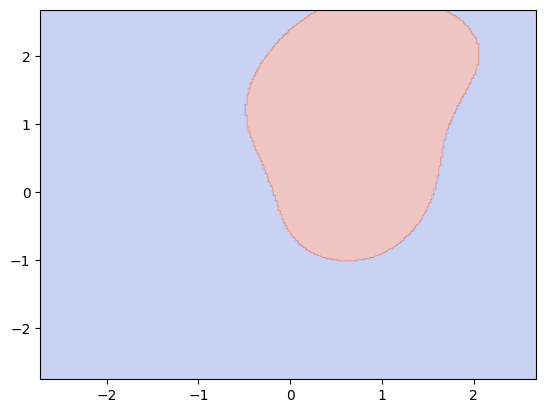

In [27]:
# area decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")


plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm") digunakan untuk mewarnai area keputusan (decision boundary) dari model SVM.

kode di atas akan menggambar area mana yang dianggap kelas 0 dan area mana yang dianggap kelas 1 oleh kernel RBF.

kelas biru (0) = tidak sakit
kelas merah(1) = sakit

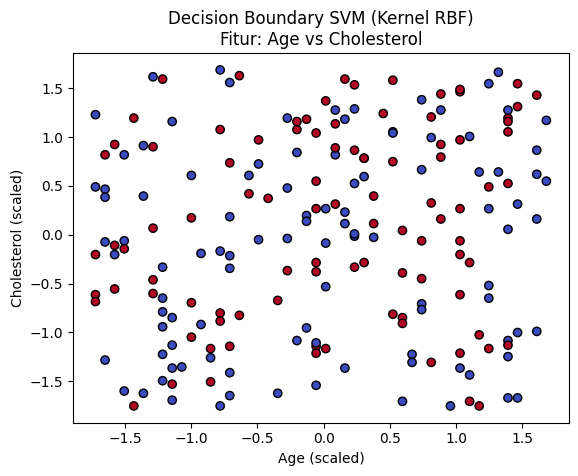

In [28]:
# titik data asli
plt.scatter(
    X_vis_scaled[:, 0], X_vis_scaled[:, 1],
    c=y_vis, edgecolors='k', cmap="coolwarm"
)

plt.title("Decision Boundary SVM (Kernel RBF)\nFitur: Age vs Cholesterol")
plt.xlabel("Age (scaled)")
plt.ylabel("Cholesterol (scaled)")
plt.show()

alasan mengapa dalam dataset ini menggunakan kernel rbf, karena pola dari dataset ini rumit dan tidak linear dan juga banyak faktor yang saling mempengaruhi (seperti umur, tekanan darah, kolestrol, dan lain- lain) dan bentuk garis grafik dari dataset ini melengkung karena pola datanya yang acak

---------------------------------------------------------------------------


Analisis apakah ini termasuk underfitting atau overfitting



In [11]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, train_pred))

test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_pred))


Train Accuracy: 0.79375
Test Accuracy: 0.575


hasilnya masuk ke kategori overfitting model belajar lebih bagus pada train accuracy tapi kurang bagus pada test accuracy, dan selisih sekitar 21%

#Evaluasi


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.575

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.67      0.62        21
           1       0.56      0.47      0.51        19

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.57      0.57      0.57        40



#Visualisasi


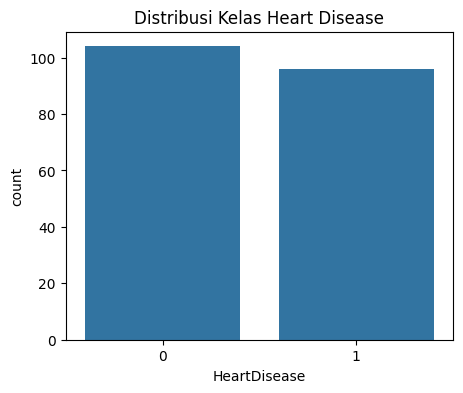

In [13]:
#Distribusi kelas
plt.figure(figsize=(5,4))
sns.countplot(x=df["HeartDisease"])
plt.title("Distribusi Kelas Heart Disease")
plt.show()


Confusion Matrix:
 [[14  7]
 [10  9]]


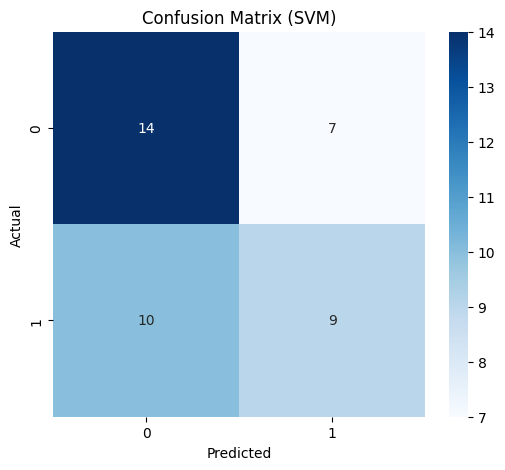

In [14]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()